# Naive Bayes
### Modelo de Regresión

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


## Selección de datos
Utilizamos la separación realizada para el mejor modelo de regresión lineal, también se incluyen variables categóricas consideradas en el análisis exploratorio.

In [162]:
train_data=pd.read_csv("../../train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
_train2 = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train2

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))

Columnas usadas (9) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [164]:
# Escalar datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
y_train.describe()

count      1021.000000
mean     180165.211557
std       78487.486133
min       34900.000000
25%      129900.000000
50%      161500.000000
75%      212000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Modelo

In [166]:
modelo = GaussianNB()
modelo.fit(X_train,y_train)

GaussianNB()

In [167]:
y_pred = modelo.predict(X_test)

In [168]:
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")

R^2: 0.6356
MAE: 31814.5548
RMSE: 49301.6193


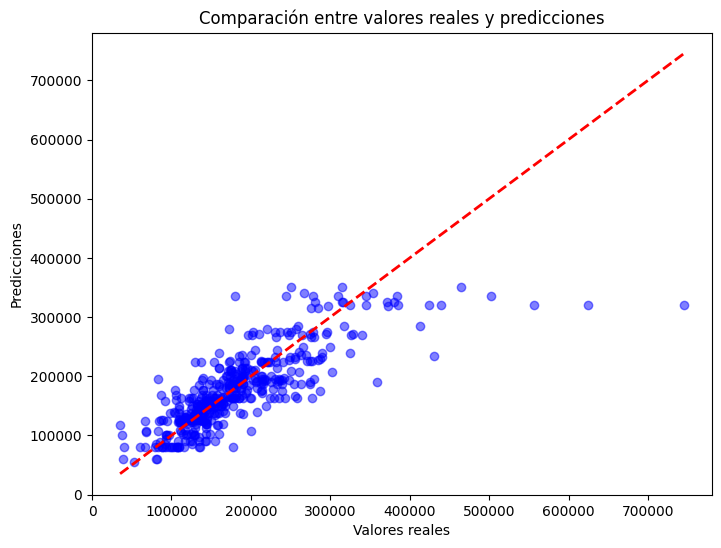

In [ ]:
errores = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

## Análisis de resultados

Text(0.5, 1.0, 'Correlación de las variables numéricas de Iris')

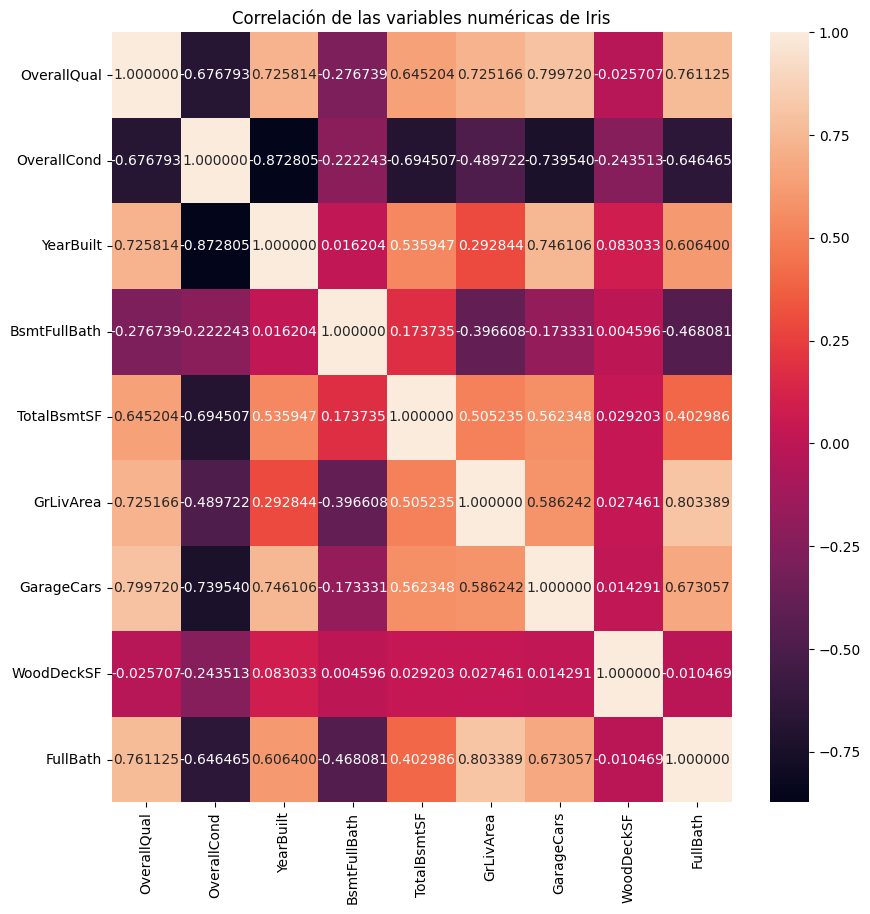

In [169]:
plt.subplots(figsize = (10,10))
sns.heatmap(_train2.corr().corr(),annot=True,fmt="f").set_title("Correlación de las variables numéricas de Iris") # ahora como HEATMAP